#Adversarial Search Algorithms
### The Minimax algorithm is a relatively simple algorithm used for optimal decision-making in game theory and artificial intelligence. Again, since these algorithms heavily rely on being efficient, the vanilla algorithm's performance can be heavily improved by using alpha-beta pruning - we'll cover both in this notebook.

###The green layer calls the Max() method on nodes in the child nodes and the red layer calls the Min() method on child nodes.

Evaluating leaves:
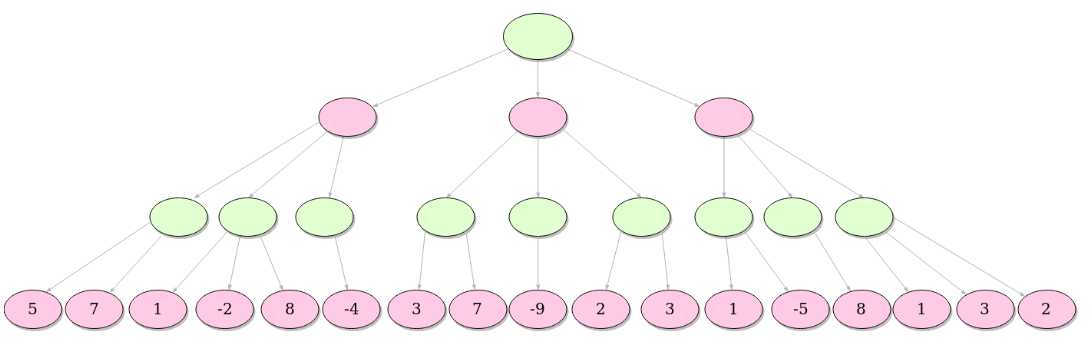

Deciding the best move for green player using depth 3:
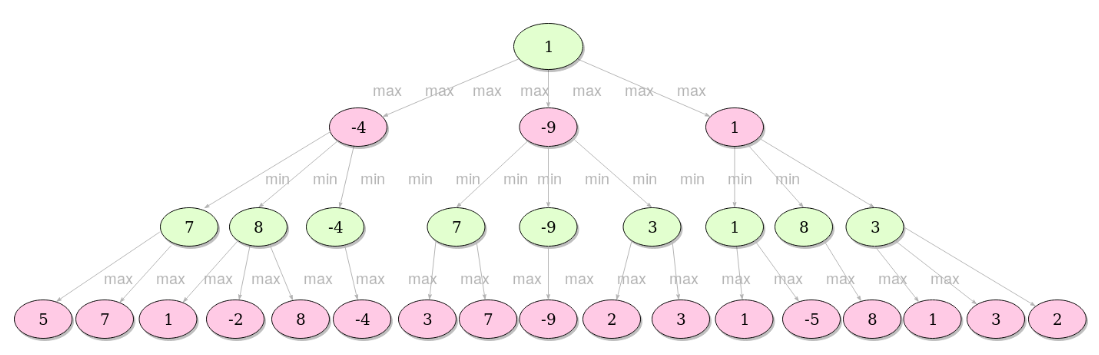

The idea is to find the best possible move for a given node, depth, and evaluation function.

In this example we've assumed that the green player seeks positive values, while the pink player seeks negative. The algorithm primarily evaluates only nodes at the given depth, and the rest of the procedure is recursive. The values of the rest of the nodes are the maximum values of their respective children if it's green player's turn, or, analogously, the minimum value if it's pink player's turn. The value in each node represents the next best move considering given information.


Let's take this example to a tic-tac-toe game. As you probably already know, the most famous strategy of player X is to start in any of the corners, which gives the player O the most opportunities to make a mistake. If player O plays anything besides center and X continues his initial strategy, it's a guaranteed win for X.

To simplify the code and get to the core of the algorithm, We'll let the minimax search from the start, so don't be surprised that the algorithm never recommends the corner strategy.

In the code below, we will be using an evaluation function that is fairly simple and common for all games in which it's possible to search the whole tree, all the way down to leaves.

###It has 3 possible values:

- -1 if player that seeks minimum wins
- 0 if it's a tie
- 1 if player that seeks maximum wins.


Since we'll be implementing this through a tic-tac-toe game, let's go through the building blocks. First, let's make a constructor and draw out the board:

In [ ]:
# We'll use the time module to measure the time of evaluating
# game tree in every move. It's a nice way to show the
# distinction between the basic Minimax and Minimax with
# alpha-beta pruning :)
import time

class Game:
    def __init__(self):
        self.initialize_game()

    def initialize_game(self):
        self.current_state = [['.','.','.'],
                              ['.','.','.'],
                              ['.','.','.']]

        # Player X always plays first
        self.player_turn = 'X'

    def draw_board(self):
        for i in range(0, 3):
            for j in range(0, 3):
                print('{}|'.format(self.current_state[i][j]), end=" ")
            print()
        print()
    # Determines if the made move is a legal move
    '''
    We've talked about legal moves in the beginning sections of the article.
    To make sure we abide by the rules, we need a way to check if a move is legal:
    '''
    def is_valid(self, px, py):
        if px < 0 or px > 2 or py < 0 or py > 2:
            return False
        elif self.current_state[px][py] != '.':
            return False
        else:
            return True
    # Checks if the game has ended and returns the winner in each case
    '''
    we need a simple way to check if the game has ended.
    In tic-tac-toe, a player can win by connecting three consecutive symbols in either a horizontal,
    diagonal or vertical line:'''

    def is_end(self):
        # Vertical win
        for i in range(0, 3):
            if (self.current_state[0][i] != '.' and
                self.current_state[0][i] == self.current_state[1][i] and
                self.current_state[1][i] == self.current_state[2][i]):
                return self.current_state[0][i]

        # Horizontal win
        for i in range(0, 3):
            if (self.current_state[i] == ['X', 'X', 'X']):
                return 'X'
            elif (self.current_state[i] == ['O', 'O', 'O']):
                return 'O'

        # Main diagonal win
        if (self.current_state[0][0] != '.' and
            self.current_state[0][0] == self.current_state[1][1] and
            self.current_state[0][0] == self.current_state[2][2]):
            return self.current_state[0][0]

        # Second diagonal win
        if (self.current_state[0][2] != '.' and
            self.current_state[0][2] == self.current_state[1][1] and
            self.current_state[0][2] == self.current_state[2][0]):
            return self.current_state[0][2]

        # Is the whole board full?
        for i in range(0, 3):
            for j in range(0, 3):
                # There's an empty field, we continue the game
                if (self.current_state[i][j] == '.'):
                    return None

        # It's a tie!
        return '.'

    # Player 'O' is max, in this case AI
    '''
    The AI we play against is seeking two things - to maximize its own score and to minimize ours.
     To do that, we'll have a max() method that the AI uses for making optimal decisions.
    '''
    def max(self):

        # Possible values for maxv are:
        # -1 - loss
        # 0  - a tie
        # 1  - win

        # We're initially setting it to -2 as worse than the worst case:
        maxv = -2

        px = None
        py = None

        result = self.is_end()

        # If the game came to an end, the function needs to return
        # the evaluation function of the end. That can be:
        # -1 - loss
        # 0  - a tie
        # 1  - win
        if result == 'X':
            return (-1, 0, 0)
        elif result == 'O':
            return (1, 0, 0)
        elif result == '.':
            return (0, 0, 0)

        for i in range(0, 3):
            for j in range(0, 3):
                if self.current_state[i][j] == '.':
                    # On the empty field player 'O' makes a move and calls Min
                    # That's one branch of the game tree.
                    self.current_state[i][j] = 'O'
                    (m, min_i, min_j) = self.min()
                    # Fixing the maxv value if needed
                    if m > maxv:
                        maxv = m
                        px = i
                        py = j
                    # Setting back the field to empty
                    self.current_state[i][j] = '.'
        return (maxv, px, py)

      # Player 'X' is min, in this case human
      #However, we will also include a min() method that will serve as a helper for us to minimize the AI's score:

    def min(self):

        # Possible values for minv are:
        # -1 - win
        # 0  - a tie
        # 1  - loss

        # We're initially setting it to 2 as worse than the worst case:
        minv = 2

        qx = None
        qy = None

        result = self.is_end()

        if result == 'X':
            return (-1, 0, 0)
        elif result == 'O':
            return (1, 0, 0)
        elif result == '.':
            return (0, 0, 0)

        for i in range(0, 3):
            for j in range(0, 3):
                if self.current_state[i][j] == '.':
                    self.current_state[i][j] = 'X'
                    (m, max_i, max_j) = self.max()
                    if m < minv:
                        minv = m
                        qx = i
                        qy = j
                    self.current_state[i][j] = '.'

        return (minv, qx, qy)
    #let's make a game loop that allows us to play against the AI:
    def play(self):
      while True:
          self.draw_board()
          self.result = self.is_end()

          # Printing the appropriate message if the game has ended
          if self.result != None:
              if self.result == 'X':
                  print('The winner is X!')
              elif self.result == 'O':
                  print('The winner is O!')
              elif self.result == '.':
                  print("It's a tie!")

              self.initialize_game()
              return

          # If it's player's turn
          if self.player_turn == 'X':

              while True:

                  start = time.time()
                  (m, qx, qy) = self.min()
                  end = time.time()
                  print('Evaluation time: {}s'.format(round(end - start, 7)))
                  print('Recommended move: X = {}, Y = {}'.format(qx, qy))

                  px = int(input('Insert the X coordinate: '))
                  py = int(input('Insert the Y coordinate: '))

                  (qx, qy) = (px, py)

                  if self.is_valid(px, py):
                      self.current_state[px][py] = 'X'
                      self.player_turn = 'O'
                      break
                  else:
                      print('The move is not valid! Try again.')

          # If it's AI's turn
          else:
              (m, px, py) = self.max()
              self.current_state[px][py] = 'O'
              self.player_turn = 'X'

In [ ]:
def main():
    g = Game()
    g.play()

if __name__ == "__main__":
    main()

.| .| .| 
.| .| .| 
.| .| .| 

Evaluation time: 2.2900808s
Recommended move: X = 0, Y = 0
Insert the X coordinate: 1
Insert the Y coordinate: 2
.| .| .| 
.| .| X| 
.| .| .| 

.| .| O| 
.| .| X| 
.| .| .| 

Evaluation time: 0.0666924s
Recommended move: X = 0, Y = 0


###Alpha-Beta Pruning
Alpha–beta (𝛼−𝛽) algorithm was discovered independently by a few researchers in the mid 1900s. Alpha–beta is actually an improved minimax using a heuristic. It stops evaluating a move when it makes sure that it's worse than the previously examined move. Such moves need not to be evaluated further.

When added to a simple minimax algorithm, it gives the same output, but cuts off certain branches that can't possibly affect the final decision - dramatically improving the performance.

The main concept is to maintain two values through whole search:

- Alpha: Best already explored option for player Max
- Beta: Best already explored option for player Min

Initially, alpha is negative infinity and beta is positive infinity, i.e. in our code we'll be using the worst possible scores for both players.

Let's see how the previous tree will look if we apply alpha-beta method:

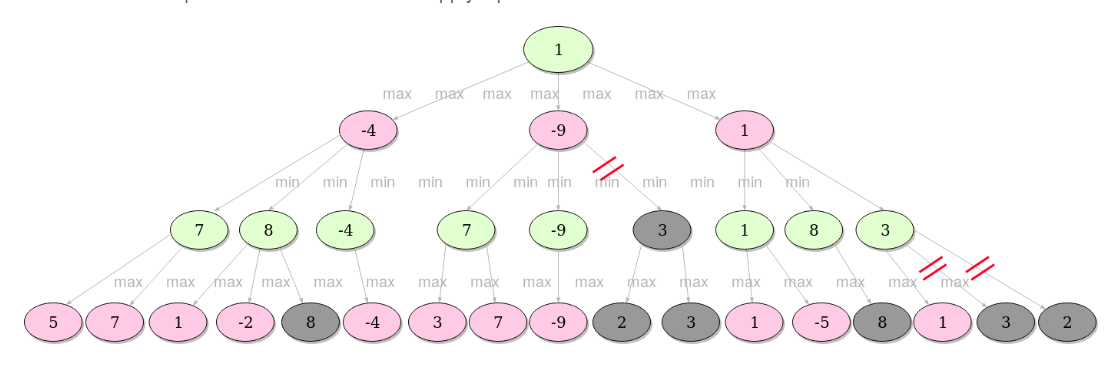

When the search comes to the first gray area (8), it'll check the current best (with minimum value) already explored option along the path for the minimizer, which is at that moment 7. Since 8 is bigger than 7, we are allowed to cut off all the further children of the node we're at (in this case there aren't any), since if we play that move, the opponent will play a move with value 8, which is worse for us than any possible move the opponent could have made if we had made another move.

A better example may be when it comes to the next gray. Note the nodes with value -9. At that point, the best (with maximum value) explored option along the path for the maximizer is -4. Since -9 is less than -4, we are able to cut off all the other children of the node we're at.

This method allows us to ignore many branches that lead to values that won't be of any help for our decision, nor they would affect it in any way.

In [ ]:
def max_alpha_beta(self, alpha, beta):
          maxv = -2
          px = None
          py = None

          result = self.is_end()

          if result == 'X':
              return (-1, 0, 0)
          elif result == 'O':
              return (1, 0, 0)
          elif result == '.':
              return (0, 0, 0)

          for i in range(0, 3):
              for j in range(0, 3):
                  if self.current_state[i][j] == '.':
                      self.current_state[i][j] = 'O'
                      (m, min_i, in_j) = self.min_alpha_beta(alpha, beta)
                      if m > maxv:
                          maxv = m
                          px = i
                          py = j
                      self.current_state[i][j] = '.'

                      # Next two ifs in Max are the only difference between regular algorithm and minimax
                      if maxv >= beta:
                          return (maxv, px, py)

                      if maxv > alpha:
                          alpha = maxv

          return (maxv, px, py)

def min_alpha_beta(self, alpha, beta):

        minv = 2

        qx = None
        qy = None

        result = self.is_end()

        if result == 'X':
            return (-1, 0, 0)
        elif result == 'O':
            return (1, 0, 0)
        elif result == '.':
            return (0, 0, 0)

        for i in range(0, 3):
            for j in range(0, 3):
                if self.current_state[i][j] == '.':
                    self.current_state[i][j] = 'X'
                    (m, max_i, max_j) = self.max_alpha_beta(alpha, beta)
                    if m < minv:
                        minv = m
                        qx = i
                        qy = j
                    self.current_state[i][j] = '.'
                    # Next two ifs in Min are the only difference between regular algorithm and minimax
                    if minv <= alpha:
                        return (minv, qx, qy)

                    if minv < beta:
                        beta = minv

        return (minv, qx, qy)


def play_alpha_beta(self):
     while True:
        self.draw_board()
        self.result = self.is_end()

        if self.result != None:
            if self.result == 'X':
                print('The winner is X!')
            elif self.result == 'O':
                print('The winner is O!')
            elif self.result == '.':
                print("It's a tie!")


            self.initialize_game()
            return

        if self.player_turn == 'X':

            while True:
                start = time.time()
                (m, qx, qy) = self.min_alpha_beta(-2, 2)
                end = time.time()
                print('Evaluation time: {}s'.format(round(end - start, 7)))
                print('Recommended move: X = {}, Y = {}'.format(qx, qy))

                px = int(input('Insert the X coordinate: '))
                py = int(input('Insert the Y coordinate: '))

                qx = px
                qy = py

                if self.is_valid(px, py):
                    self.current_state[px][py] = 'X'
                    self.player_turn = 'O'
                    break
                else:
                    print('The move is not valid! Try again.')

        else:
            (m, px, py) = self.max_alpha_beta(-2, 2)
            self.current_state[px][py] = 'O'
            self.player_turn = 'X'

#Conclusion
Alpha-beta pruning makes a major difference in evaluating large and complex game trees. Even though tic-tac-toe is a simple game itself, we can still notice how without alpha-beta heuristics the algorithm takes significantly more time to recommend the move in the first turn.